In [15]:
# basic
import numpy as np
import pandas as pd

# get data
# ! conda install pandas-datareader s
import pandas_datareader as pdr

# visual
# ! pip install mpl-finance
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

# https://github.com/mrjbq7/ta-lib
# ! pip install ta-lib 
import talib

In [16]:
start_date = datetime.datetime(2018,1,1)
end_date= datetime.datetime(2018,12,31)

In [20]:
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start_date ,end=end_date)
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,232.5,231.0,231.5,232.5,18055269.0,224.324173
2018-01-03,238.0,235.5,236.0,237.0,29308091.0,228.665939
2018-01-04,240.0,236.5,240.0,239.5,29096613.0,231.078018
2018-01-05,240.0,238.0,240.0,240.0,22438255.0,231.560440
2018-01-08,242.5,240.5,242.0,242.0,20233692.0,233.490112


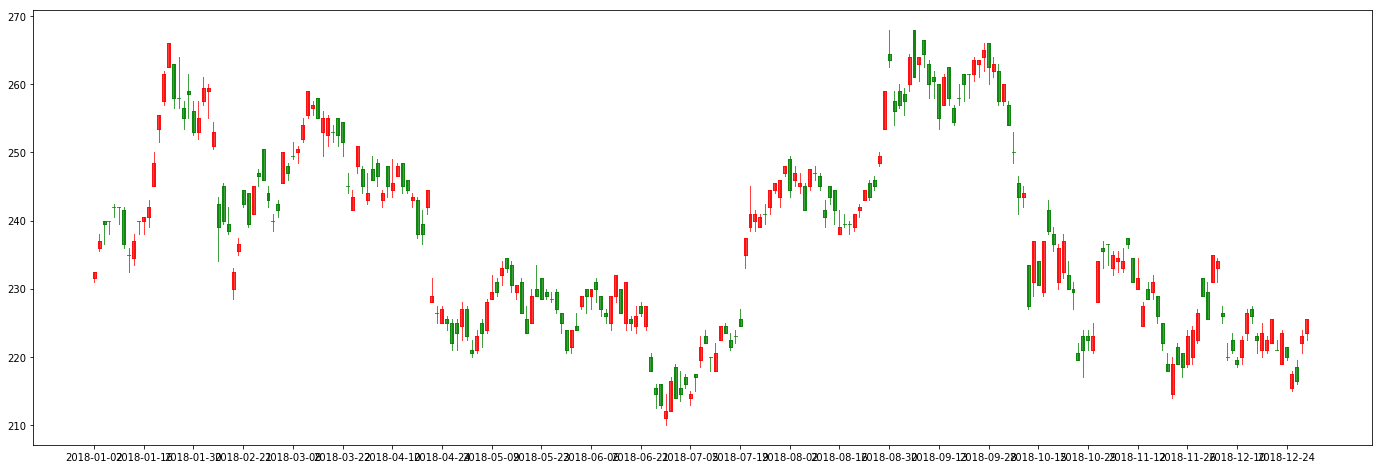

In [21]:
df_2330.index = df_2330.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

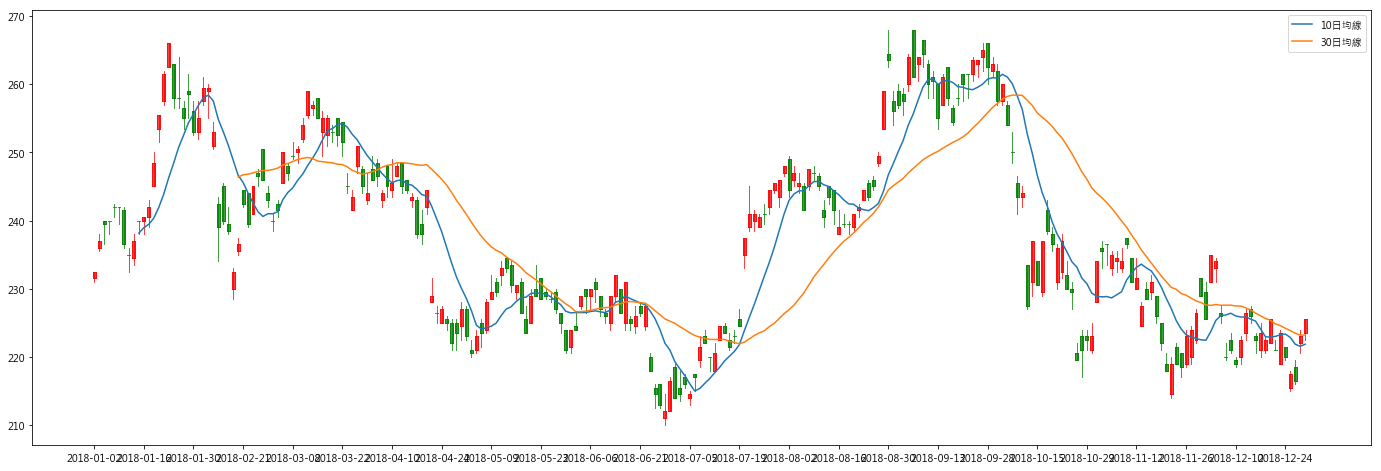

In [22]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.legend();

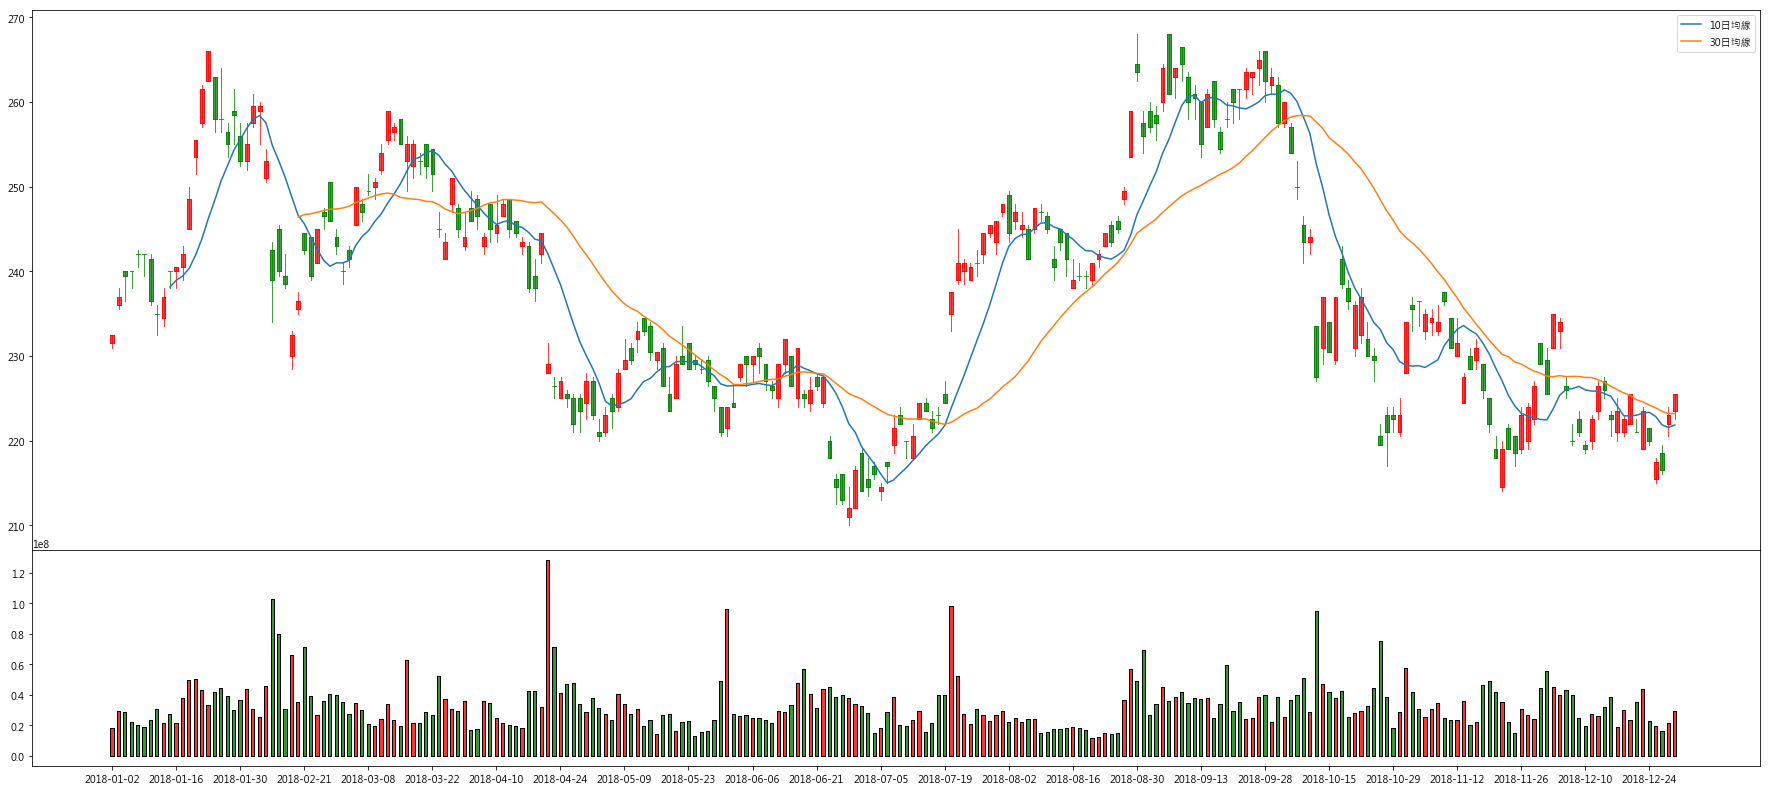

In [23]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.legend();

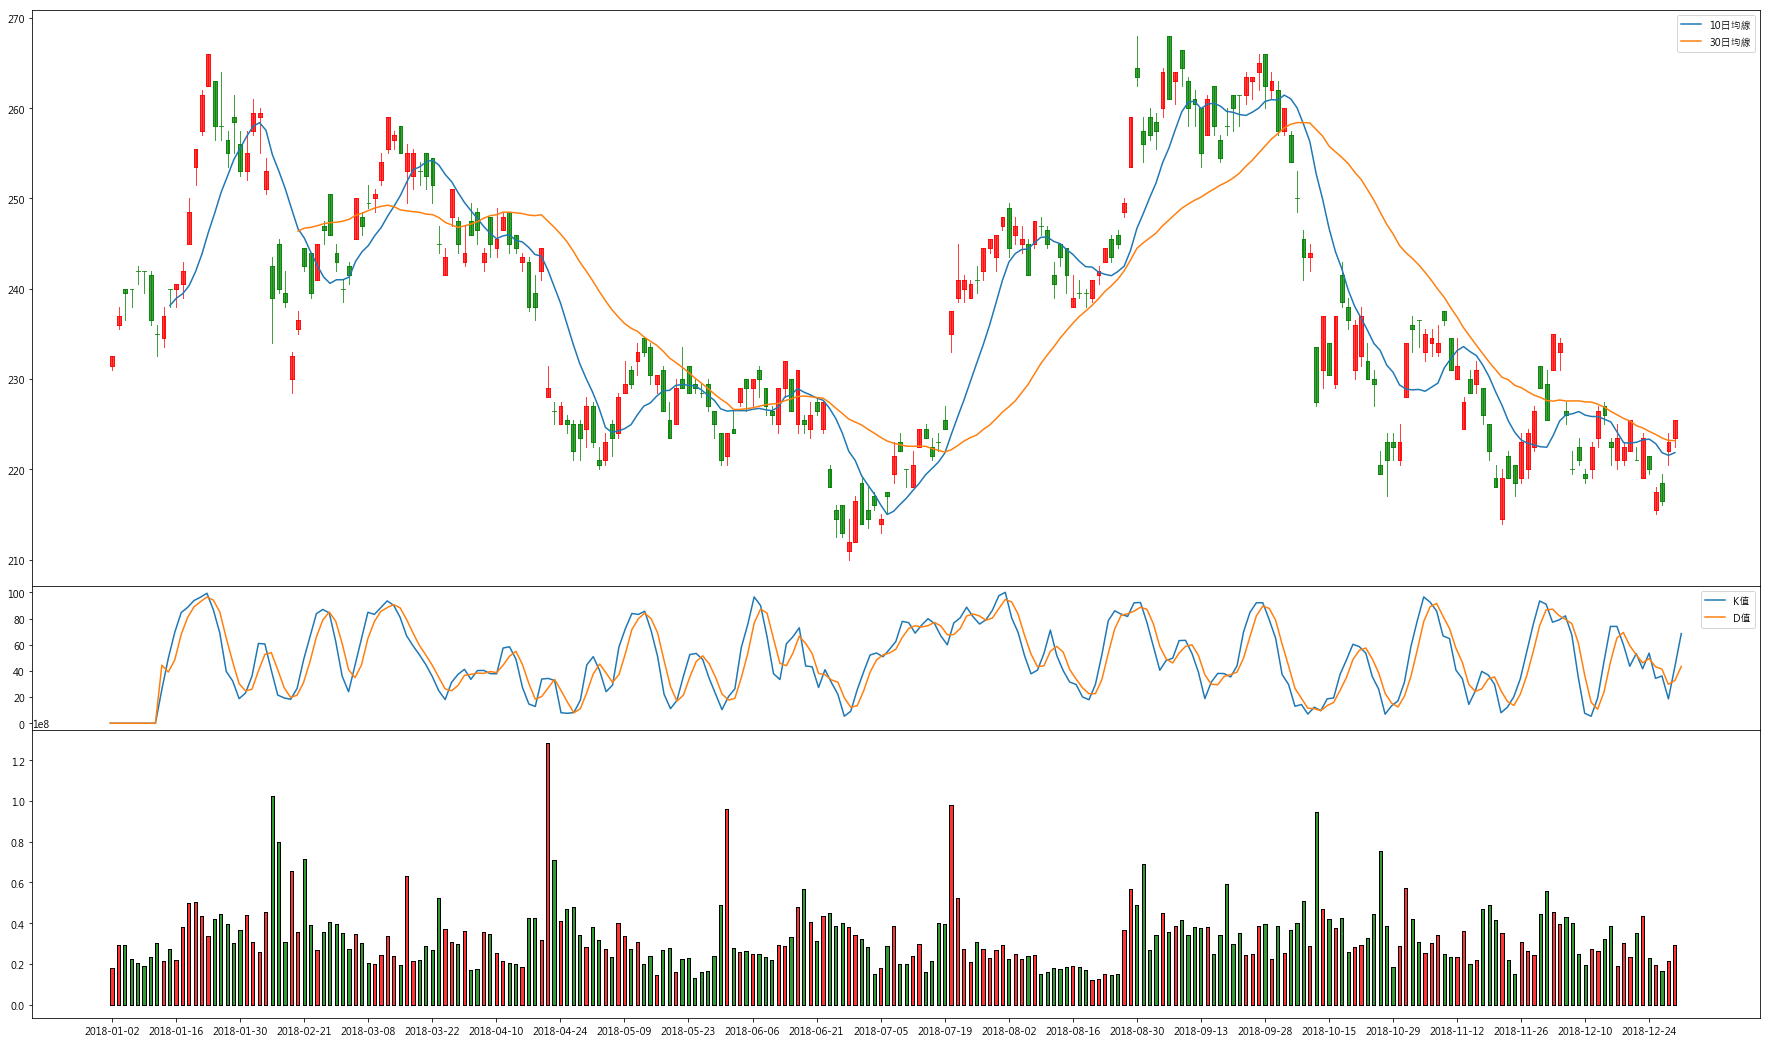

In [24]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])
df_2330['k'].fillna(value=0, inplace=True)
df_2330['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df_2330['k'], label='K值')
ax2.plot(df_2330['d'], label='D值')
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

mpf.volume_overlay(ax3, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_2330.index), 10))
ax3.set_xticklabels(df_2330.index[::10])

ax.legend();
ax2.legend();